In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
pip install spacy

  Using cached spacy-3.4.1-cp38-cp38-win_amd64.whl (12.1 MB)
  Attempting uninstall: smart-open
    Found existing installation: smart-open 6.0.0
    Uninstalling smart-open-6.0.0:
      Successfully uninstalled smart-open-6.0.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import warnings
import re
import string
warnings.filterwarnings("ignore")
import spacy
nlp = spacy.load('en_core_web_lg')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop= stopwords.words('english')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemm= WordNetLemmatizer()
from textblob import TextBlob
import bs4
import requests
from spacy import displacy
from spacy.matcher import Matcher 
from spacy.tokens import Span 
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SANDY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SANDY\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
%%time
#using pandas to read the train and test file 
train= pd.read_csv('tweet_with_location.csv', encoding="ISO-8859-1")
'''test=pd.read_csv('/kaggle/input/twitter-sentiment-analysis-hatred-speech/test.csv', encoding="ISO-8859-1")
df= pd.concat([train,test])'''
df = train
print("Complete data frame shape:",df.shape)

Complete data frame shape: (156694, 10)
Wall time: 1.72 s


In [4]:
df.head()

,Tweet_ID,Date_and_Time,User_Id,Country,State,Town,Longtitude,Latitude,Language,Tweet_text
0,1.550000e+18,25-07-2022 03:10,1.360000e+18,^indonesia,^dummy state,^gamping,-7.78425,110.31781,tl,@linnnnzzzzzz @Lita_tralala30 Hahaha mamina K...
1,1.550000e+18,25-07-2022 03:10,1.490000e+18,^indonesia,^dummy state,^kotamobagu,0.73433,124.30890,und,@mutia_tante yes
2,1.550000e+18,25-07-2022 03:10,1.530000e+18,^indonesia,^kalimantan selatan,^dummy city,-3.45020,115.45088,in,Untuk mampu IKN Citra Indonesia https://t.co/9...
3,1.550000e+18,25-07-2022 03:10,8.190000e+17,^islamic republic of iran,^dummy state,^dummy city,32.39654,53.67497,fa,@Nima_Gh1980 Ø´Ø±ÛØ¹ØªÛ Ø¨Ø¯Ø¨Ø®Øª Ú©Ø¬Ø§ Ù...
4,1.550000e+18,25-07-2022 03:10,1.177492e+09,^pakistan,^dummy state,^karachi,24.90508,67.04219,en,"Glad to listen the news ,and letter from you s..."


In [5]:
train["Tweet_text"].value_counts() #we have an imbalance class problem 

Promote it on @AssemblageOfNft                                                                                                                                                                                                                                                                                              128
#DrAyya84  #psmfthirupattur                                                                                                                                                                                                                                                                                                  50
@FWBESS Hmu                                                                                                                                                                                                                                                                                                                  34
@sgc_rguktb @PawanKalyan @KTRTRS @Telang

# Text Cleaning

I am going cover text cleaning teachniques one by one in detail

The first step of text analytics is to clean text from noises. You may be thinking what is noise in text. A simple definition of noise is anything that will be not useful in our analysis is noise. If I try to classify noise then it can be of 4 types:
1. Common Entities- Things like stopwords(is, the etc.), URLs, Hashtags, Punctuations, Numbers etc.
2. Slangs- Commonly used words that are not part of dictionaries
3. Grammatical and spelling errors
4. Keyword Variations

Text cleaning not only helps us get rid of noise or repetitive information but also reduces dimension of data and makes machine learning model simpler.
We will now remove noise one by one. I will show you how you can clean text at once by creating user defined functions.

**Maintain uniformity**
1. *Fixing encoding*- If you would have noticed we had already imported and converted data in 'ISO-8859-1' because we are dealing with tweets here. Each language has its own encoding such as 'ASCII' for English, 'BIG5' for Chinese and 'LATIN' for West Europe. It is always a good practice to convert them into a standard and unique format. One of the commonly used format is 'UTF8'.
2. *Change casing*- To maintain uniformity, it always advisable to convert the text into lower case. 

In [6]:
df['Tweet_text']= df["Tweet_text"].str.lower()
df.head()

,Tweet_ID,Date_and_Time,User_Id,Country,State,Town,Longtitude,Latitude,Language,Tweet_text
0,1.550000e+18,25-07-2022 03:10,1.360000e+18,^indonesia,^dummy state,^gamping,-7.78425,110.31781,tl,@linnnnzzzzzz @lita_tralala30 hahaha mamina k...
1,1.550000e+18,25-07-2022 03:10,1.490000e+18,^indonesia,^dummy state,^kotamobagu,0.73433,124.30890,und,@mutia_tante yes
2,1.550000e+18,25-07-2022 03:10,1.530000e+18,^indonesia,^kalimantan selatan,^dummy city,-3.45020,115.45088,in,untuk mampu ikn citra indonesia https://t.co/9...
3,1.550000e+18,25-07-2022 03:10,8.190000e+17,^islamic republic of iran,^dummy state,^dummy city,32.39654,53.67497,fa,@nima_gh1980 ø´ø±ûø¹øªû ø¨ø¯ø¨ø®øª ú©ø¬ø§ ù...
4,1.550000e+18,25-07-2022 03:10,1.177492e+09,^pakistan,^dummy state,^karachi,24.90508,67.04219,en,"glad to listen the news ,and letter from you s..."


3. Removal of HTML Noise/characters- 

If you are extracting from web, it might contain some HTML noise or tags such <,> etc.

In [7]:
df['Tweet_text']=df['Tweet_text'].str.replace("<[^<]+?>","",regex=True)
df.head()

,Tweet_ID,Date_and_Time,User_Id,Country,State,Town,Longtitude,Latitude,Language,Tweet_text
0,1.550000e+18,25-07-2022 03:10,1.360000e+18,^indonesia,^dummy state,^gamping,-7.78425,110.31781,tl,@linnnnzzzzzz @lita_tralala30 hahaha mamina k...
1,1.550000e+18,25-07-2022 03:10,1.490000e+18,^indonesia,^dummy state,^kotamobagu,0.73433,124.30890,und,@mutia_tante yes
2,1.550000e+18,25-07-2022 03:10,1.530000e+18,^indonesia,^kalimantan selatan,^dummy city,-3.45020,115.45088,in,untuk mampu ikn citra indonesia https://t.co/9...
3,1.550000e+18,25-07-2022 03:10,8.190000e+17,^islamic republic of iran,^dummy state,^dummy city,32.39654,53.67497,fa,@nima_gh1980 ø´ø±ûø¹øªû ø¨ø¯ø¨ø®øª ú©ø¬ø§ ù...
4,1.550000e+18,25-07-2022 03:10,1.177492e+09,^pakistan,^dummy state,^karachi,24.90508,67.04219,en,"glad to listen the news ,and letter from you s..."


4. Contractions

Because of character limit in Twitter, people often use contracted form of word to fit more characters. I have managed to get a dictionary of such word. Let's look up and normalize

In [8]:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"i'd": "i had / i would",
"i'd've": "i would have",
"i'll": "i shall / I will",
"i'll've": "i shall have / i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",  
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

cont_re = re.compile('(%s)' % '|'.join(contractions.keys()))
def expand(s, contractions = contractions):
    def replace(match):
        return contractions[match.group(0)]
    return cont_re.sub(replace, str(s))
df['Tweet_text'] =df['Tweet_text'].apply(expand)
df.head()

,Tweet_ID,Date_and_Time,User_Id,Country,State,Town,Longtitude,Latitude,Language,Tweet_text
0,1.550000e+18,25-07-2022 03:10,1.360000e+18,^indonesia,^dummy state,^gamping,-7.78425,110.31781,tl,@linnnnzzzzzz @lita_tralala30 hahaha mamina k...
1,1.550000e+18,25-07-2022 03:10,1.490000e+18,^indonesia,^dummy state,^kotamobagu,0.73433,124.30890,und,@mutia_tante yes
2,1.550000e+18,25-07-2022 03:10,1.530000e+18,^indonesia,^kalimantan selatan,^dummy city,-3.45020,115.45088,in,untuk mampu ikn citra indonesia https://t.co/9...
3,1.550000e+18,25-07-2022 03:10,8.190000e+17,^islamic republic of iran,^dummy state,^dummy city,32.39654,53.67497,fa,@nima_gh1980 ø´ø±ûø¹øªû ø¨ø¯ø¨ø®øª ú©ø¬ø§ ù...
4,1.550000e+18,25-07-2022 03:10,1.177492e+09,^pakistan,^dummy state,^karachi,24.90508,67.04219,en,"glad to listen the news ,and letter from you s..."


5. Removal of URLs, Hashtag, Mentions-

URLs, punctuations, new line characters etc. are very common in text data. If we doing any analysis, it is rare to have imporatnce of these characters

In [9]:
#Remove http and url
df['Tweet_text']=df['Tweet_text'].str.replace('https?://\S+|www\.\S+', '',regex=True)
#Remove punctuations and 
df['Tweet_text']=df['Tweet_text'].str.replace('[%s]' % re.escape(string.punctuation), '', regex=True)
#lets remove new line characters if any
df['Tweet_text']=df['Tweet_text'].str.replace('\n', '', regex=True)
df.head()

,Tweet_ID,Date_and_Time,User_Id,Country,State,Town,Longtitude,Latitude,Language,Tweet_text
0,1.550000e+18,25-07-2022 03:10,1.360000e+18,^indonesia,^dummy state,^gamping,-7.78425,110.31781,tl,linnnnzzzzzz litatralala30 hahaha mamina kyak...
1,1.550000e+18,25-07-2022 03:10,1.490000e+18,^indonesia,^dummy state,^kotamobagu,0.73433,124.30890,und,mutiatante yes
2,1.550000e+18,25-07-2022 03:10,1.530000e+18,^indonesia,^kalimantan selatan,^dummy city,-3.45020,115.45088,in,untuk mampu ikn citra indonesia
3,1.550000e+18,25-07-2022 03:10,8.190000e+17,^islamic republic of iran,^dummy state,^dummy city,32.39654,53.67497,fa,nimagh1980 ø´ø±ûø¹øªû ø¨ø¯ø¨ø®øª ú©ø¬ø§ ùù ...
4,1.550000e+18,25-07-2022 03:10,1.177492e+09,^pakistan,^dummy state,^karachi,24.90508,67.04219,en,glad to listen the news and letter from you soon


6. Remove Emojis

Emojis are common in tweets or any social media data. We can remove them or analyze separately.

In [10]:
#for this analysis, I am removing the emojis
def emojis(text):
    emoji = re.compile("["u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji.sub(r'', text)

df['Tweet_text']=df['Tweet_text'].apply(lambda x: emojis(x))
df.head()

,Tweet_ID,Date_and_Time,User_Id,Country,State,Town,Longtitude,Latitude,Language,Tweet_text
0,1.550000e+18,25-07-2022 03:10,1.360000e+18,^indonesia,^dummy state,^gamping,-7.78425,110.31781,tl,linnnnzzzzzz litatralala30 hahaha mamina kyak...
1,1.550000e+18,25-07-2022 03:10,1.490000e+18,^indonesia,^dummy state,^kotamobagu,0.73433,124.30890,und,mutiatante yes
2,1.550000e+18,25-07-2022 03:10,1.530000e+18,^indonesia,^kalimantan selatan,^dummy city,-3.45020,115.45088,in,untuk mampu ikn citra indonesia
3,1.550000e+18,25-07-2022 03:10,8.190000e+17,^islamic republic of iran,^dummy state,^dummy city,32.39654,53.67497,fa,nimagh1980 ø´ø±ûø¹øªû ø¨ø¯ø¨ø®øª ú©ø¬ø§ ùù ...
4,1.550000e+18,25-07-2022 03:10,1.177492e+09,^pakistan,^dummy state,^karachi,24.90508,67.04219,en,glad to listen the news and letter from you soon


7. Stopwords Removal

Stopwords are common and frequently used words in sentence. They add very little value to the analysis and increase dimensionality of the data 

In [11]:
df['Tweet_text'].apply(lambda x: [item for item in x if item not in stop])
df.head()

,Tweet_ID,Date_and_Time,User_Id,Country,State,Town,Longtitude,Latitude,Language,Tweet_text
0,1.550000e+18,25-07-2022 03:10,1.360000e+18,^indonesia,^dummy state,^gamping,-7.78425,110.31781,tl,linnnnzzzzzz litatralala30 hahaha mamina kyak...
1,1.550000e+18,25-07-2022 03:10,1.490000e+18,^indonesia,^dummy state,^kotamobagu,0.73433,124.30890,und,mutiatante yes
2,1.550000e+18,25-07-2022 03:10,1.530000e+18,^indonesia,^kalimantan selatan,^dummy city,-3.45020,115.45088,in,untuk mampu ikn citra indonesia
3,1.550000e+18,25-07-2022 03:10,8.190000e+17,^islamic republic of iran,^dummy state,^dummy city,32.39654,53.67497,fa,nimagh1980 ø´ø±ûø¹øªû ø¨ø¯ø¨ø®øª ú©ø¬ø§ ùù ...
4,1.550000e+18,25-07-2022 03:10,1.177492e+09,^pakistan,^dummy state,^karachi,24.90508,67.04219,en,glad to listen the news and letter from you soon


8. Normalization (Lemmatization)

Inflectional form of word such better, best for good are often found in text data. They increases the dimensionality of data and little value 

In [12]:
def lemmatization(df):
    df['Tweet_text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

df.head()

,Tweet_ID,Date_and_Time,User_Id,Country,State,Town,Longtitude,Latitude,Language,Tweet_text
0,1.550000e+18,25-07-2022 03:10,1.360000e+18,^indonesia,^dummy state,^gamping,-7.78425,110.31781,tl,linnnnzzzzzz litatralala30 hahaha mamina kyak...
1,1.550000e+18,25-07-2022 03:10,1.490000e+18,^indonesia,^dummy state,^kotamobagu,0.73433,124.30890,und,mutiatante yes
2,1.550000e+18,25-07-2022 03:10,1.530000e+18,^indonesia,^kalimantan selatan,^dummy city,-3.45020,115.45088,in,untuk mampu ikn citra indonesia
3,1.550000e+18,25-07-2022 03:10,8.190000e+17,^islamic republic of iran,^dummy state,^dummy city,32.39654,53.67497,fa,nimagh1980 ø´ø±ûø¹øªû ø¨ø¯ø¨ø®øª ú©ø¬ø§ ùù ...
4,1.550000e+18,25-07-2022 03:10,1.177492e+09,^pakistan,^dummy state,^karachi,24.90508,67.04219,en,glad to listen the news and letter from you soon


9. Additional Repetitive word

We know from the problem statement that names have been replaced by word "user". Therefore it will right exclude them as well 

In [21]:
df['Tweet_text']=df['Tweet_text'].str.replace('user', '',regex=True)
df.tail()

,Tweet_ID,Date_and_Time,User_Id,Country,State,Town,Longtitude,Latitude,Language,Tweet_text
156689,1.540000e+18,17-06-2022 07:56,1.510000e+18,^à¤­à¤¾à¤°à¤¤,^rajasthan,^jaipur,26.90968,75.74752,hi,ompraka05925377 pskhachariyawas à¤®à¤¾à¤¨à¤¨à¥...
156690,1.540000e+18,17-06-2022 07:56,1.500000e+18,^india,^bihar,^dummy city,25.90412,85.81130,qme,baliya agneepathrecruitmentscheme narendramodi
156691,1.540000e+18,17-06-2022 07:56,1.360000e+18,^india,^delhi,^delhi,28.63849,77.09509,hi,mannshi à¤à¥à¤¹à¤¨à¥ à¤à¤¿à¤¸à¥ à¤à¤¹à¤¤...
156692,1.540000e+18,17-06-2022 07:56,9.577285e+08,^india,^dummy state,^ashta,23.01489,76.72242,hi,mayash16 à¤¹à¤® à¤¨à¤¹à¥à¤ à¤¹à¥ à¤à¤¸à¤®à...
156693,1.540000e+18,17-06-2022 07:56,4.601425e+08,^india,^dummy state,^daskroi,22.98093,72.63668,en,actfibernet thankyou today will join actfibernet


In [22]:
#Restricting graph to 5000 tweets only
tweets=df['Tweet_text'][:10000]

In the term of semantic web, a sentence consist of subject, predicate and object. It is also known as triples. With below code, we going to ectract subject and object from sentences and form a knowledge graph. If you want to read more about the below codes 
please click attached [link](https://www.analyticsvidhya.com/blog/2019/10/how-to-build-knowledge-graph-text-using-spacy/)- An article by Prateek Joshi

In [23]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text


  return [ent1.strip(), ent2.strip()]

In [24]:
entity_pairs = []

for i in tqdm(tweets):
  entity_pairs.append(get_entities(i))

entity_pairs[10:20]


 17%|█▋        | 1672/10000 [00:16<01:16, 108.32it/s]


 33%|███▎      | 3323/10000 [00:34<01:13, 90.43it/s]


 50%|████▉     | 4978/10000 [00:51<00:42, 117.05it/s]


 67%|██████▋   | 6670/10000 [01:08<00:35, 95.07it/s]


 83%|████████▎ | 8276/10000 [01:25<00:19, 88.56it/s]


 98%|█████████▊| 9812/10000 [01:42<00:01, 97.05it/s]


100%|██████████| 10000/10000 [01:44<00:00, 95.63it/s]


[['yati si von', 'kaayo sakong life'],
 ['', ''],
 ['giognzls hahaha', ''],
 ['', 'one algorithm ng day'],
 ['i', 'too  lolz'],
 ['marshablackburn james madison', 'thomas graves'],
 ['', ''],
 ['gurukuls gurukul need', 'time'],
 ['', ''],
 ['', '']]

Similar to subject and object, let's extract predicates as well

In [25]:
def predicates(sent):
    doc = nlp(sent)
    # Matcher class object 
    matcher = Matcher(nlp.vocab)

    #define the pattern 
    pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

    matcher.add("matching_1", [pattern]) 

    matches = matcher(doc)
    k = len(matches) - 1

    span = doc[matches[k][1]:matches[k][2]] 

    return(span.text)

In [26]:
predicates = [predicates(i) for i in tqdm(tweets)]


  0%|          | 35/10000 [00:00<02:28, 67.25it/s]

IndexError: list index out of range


  0%|          | 35/10000 [00:12<02:28, 67.25it/s]

In [27]:
pd.Series(entity_pairs).value_counts()[:10]

[, ]                                                                               3768
[, gurukuls sant time]                                                               28
[i, ]                                                                                25
[asharamji sant gurukul, ®  à¤¶à¤¿à¤à¥à¤·à¤¾à¤à¤à¥à¤à¤¸à¤à¤¸à¥à¤à¤¾à¤]      23
[à¤¸à¥à¤¨à¥  à¤à¥à¤à¤, need à¤¨à¥ time]                                        22
[à¤à¤¿à¤¸à¤¸à¥ à¤à¤¿à¤à¤ ¦, gurukuls à¤¸à¤à¤µà¤ à¥ time]                       20
[, ® ® ®]                                                                            18
[, gurukuls ¦ time]                                                                  18
[gurukuls  need, time]                                                               17
[it, ]                                                                               16
dtype: int64

Let's now create a data frame with subject predicate and object

In [28]:
# extract subject
subject = [i[0] for i in entity_pairs]

# extract object
object1 = [i[1] for i in entity_pairs]

graph_df = pd.DataFrame({'subject':subject,  'predicate':predicates, 'object':object1})

We will now create a multi directed knowledge graph using networkx library. If you want to read more about the library, please click the below link

https://networkx.github.io/

In [29]:
# create a directed-graph from a dataframe
graph=nx.from_pandas_edgelist(graph_df, "subject", "object", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

  1%|          | 40/5000 [03:58<8:13:45,  5.97s/it]


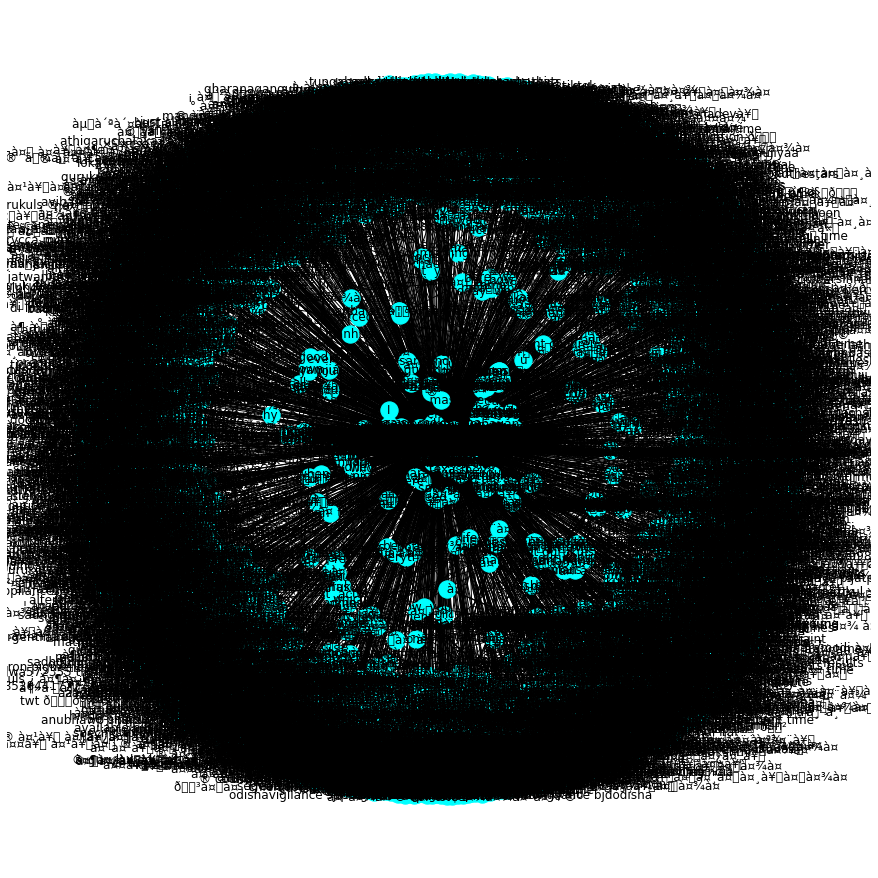

In [30]:
#Lets plot it using plotly
plt.figure(figsize=(12,12))

pos = nx.spring_layout(graph)
nx.draw(graph, with_labels=True, node_color='Cyan', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

Let's perform some graph analytics and what people are reffering to as "love" in the dataset 

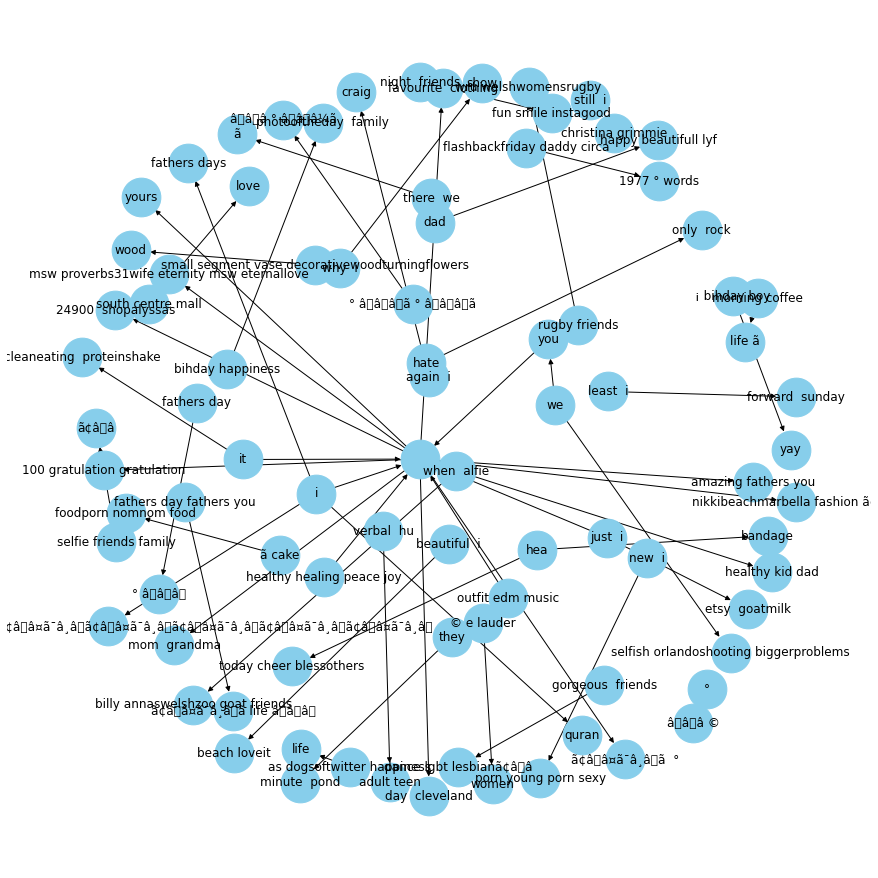

In [ ]:
graph=nx.from_pandas_edgelist(graph_df[graph_df['predicate']=="love"], "subject", "object", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph, k = 0.5) # k regulates the distance between nodes
nx.draw(graph, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

I hope it was helpful. Please upvote for support.
Also, refer to my other notebooks if you are looking for word embedding techniques Word2Vec, GloVe etc. and text classification.